In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
import warnings
import xgboost as xgb
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train = pd.read_csv('assignment1_data/train.csv')
test = pd.read_csv('assignment1_data/test.csv')

#### Задание 1
Сделать базовый анализ данных: вывести размерность датасетов, посчитать базовые статистики, выполнить анализ пропусков, сделать выводы

In [3]:
print('train.shape = {} rows, {} cols'.format(*train.shape))
print('test.shape = {} rows, {} cols'.format(*test.shape))

train.shape = 200000 rows, 202 cols
test.shape = 200000 rows, 201 cols


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [5]:
pd.options.display.max_columns = 300

In [6]:
train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2000

In [7]:
train.tail()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,-0.6209,5.6669,3.7574,-9.5348,13.9860,5.2982,8.2705,14.1527,7.4540,-5.0105,12.0465,8.6349,9.9137,25.1376,1.0914,3.2326,7.7802,13.9939,2.9085,0.1005,4.2369,7.5665,-9.2149,9.5746,1.4012,7.4211,11.0075,7.8080,4.5567,4.9861,9.7471,0.0722,5.9053,8.1743,10.8800,11.1665,4.2600,-2.1296,8.7833,-15.5727,-8.4916,22.1905,12.4110,15.1168,1.6041,6.1868,10.9576,18.7371,15.2986,5.7322,5.1244,9.8225,14.0315,-23.6064,-1.3403,-2.5577,6.3582,-5.4557,5.6063,7.0054,5.0171,-5.0055,28.9502,1.2297,4.4918,19.5568,20.8357,19.2136,17.6422,17.9836,4.0395,14.0761,-5.7878,16.3870,-14.1721,-13.0269,-2.5955,21.4526,15.6163,0.9845,8.2110,-0.8553,-12.1682,6.7779,7.3895,10.5084,15.5057,-0.6812,5.8999,6.1825,3.1038,-1.6930,-18.8473,9.9358,25.3359,1.3647,11.8509,5.0357,6.4630,18.4008,14.3787,19.0369,-0.6364,6.9155,3.6763,3.1460,4.9442,-1.8289,1.3521,34.6265,-0.6869,-5.3781,20.5030,10.9614,4.9677,6.1408,2.2575,12.8757,14.2253,-1.2868,0.2212,16.8661,12.7663,1.2414,7.1304,7.4108,-6.3369,3.0760,24.9796,20.3410,5.3312,23.7116,2.4745,11.2013,17.8165,13.0057,9.5506,5.3589,13.2491,-3.3068,3.6998,2.5927,14.3025,8.1596,7.9609,18.3343,4.3086,1.3546,12.4158,-5.3985,16.3683,10.4522,35.4923,5.5477,7.4244,12.5459,-6.7840,31.1895,2.6529,-11.1867,9.8865,5.4730,-5.3880,-0.4698,24.4025,-5.4493,11.3529,7.7075,-5.0491,13.0756,15.8271,3.3580,-14.3371,10.4421,7.6530,9.4585,22.7783,-4.0305,4.2233,-6.3906,13.5058,-0.4594,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,-3.6797,6.0019,6.5576,-11.8776,14.4131,3.3087,3.5800,14.1597,7.5191,-8.8715,17.9467,17.0237,6.6459,18.2345,0.8982,2.2532,15.4977,13.3282,5.2281,-3.7424,5.5144,5.7148,-13.7470,7.4369,1.3041,12.7552,12.5362,-1.1002,2.4370,6.2631,14.8565,-2.9862,-7.8820,7.1320,11.8869,11.4218,8.9282,-27.2007,14.5962,-19.8502,26.0775,24.3915,12.6910,10.2453,6.8173,4.5666,-9.5685,18.4685,16.9534,7.3660,4.7038,9.4559,6.0037,-10.8728,0.7859,4.7000,7.8077,-1.7926,6.1534,12.9087,5.0398,-0.4247,22.6256,0.7166,0.6533,13.5821,20.3267,25.5380,14.0155,17.3326,4.2046,14.0195,11.4812,17.9954,-18.3549,-3.4537,1.1233,22.3135,1.9795,16.0239,4.7492,0.2446,-39.6406,6.9473,9.9392,11.1977,14.1006,-0.8012,18.8214,32.9827,1.7989,-0.2476,-15.5294,9.5501,11.8548,1.5127,11.3998,4.2304,6.6777,11.3434,14.2993,13.1205,13.3224,7.3143,3.6817,9.7780,4.0491,2.7221,4.4344,3.7648,2.1927,-2.9197,23.0679,12.2112,

Проверим на наличие пропусков

In [8]:
train.isnull().values.any()

False

In [9]:
test.isnull().values.any()

False

In [10]:
numerical_features = train.select_dtypes(include=[np.number])
print(f'Numerical Features Count: {numerical_features.shape[1]}')

Numerical Features Count: 201


In [11]:
discrete_feature = [
    feature for feature in numerical_features
    if len(train[feature].unique())<25
]
print(f'Discrete Variables: {discrete_feature}')

Discrete Variables: ['target']


 - Данные не имеют пропусков
 - Все признаки можно разбить на:
  - 1 признак id от train_0 до train_199999 по порядку
  - target признак (0 или 1)
  - и 200 непрерывных (не дискретных) числовых признаков
 - Можно будет попробовать создать числовой признак на основе ID

#### Задание 2
Сделать базовый анализ целевой переменной, сделать выводы

In [12]:
train['target'].value_counts()

0    179902
1     20098
Name: target, dtype: int64

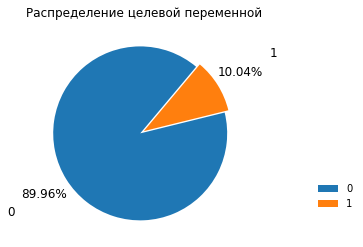

In [13]:
values = train['target'].value_counts() * 10**4 // len(train['target']) / 100
plt.pie(values, labels=[0, 1], autopct='%.2f%%', startangle=50, 
        pctdistance=1.3, labeldistance=1.7, explode=(0.05, 0), textprops={'fontsize': 12})
plt.title('Распределение целевой переменной')
plt.legend(frameon=False, bbox_to_anchor=(1.5, 0.3))
plt.show()

Видим сильный дисбалланс классов. Для многих моделей придется делать балансировку

#### Задание 3
Построить распределение признаков в зависимости от значения целевой переменной и распределение признаков для обучающей и тестовой выборки (если машина не позволяет построить распределение для всех признаков, то выполнить задание для признаков var_0, var_1, var_2, var_5, var_9, var_10, var_13, var_20, var_26, var_40, var_55, var_80, var_106, var_109, var_139, var_175, var_184, var_196), сделать выводы;

In [14]:
continuous_feature = [
    feature for feature in numerical_features
    if feature not in discrete_feature
]
n_rows = (len(continuous_feature) + 3) // 4

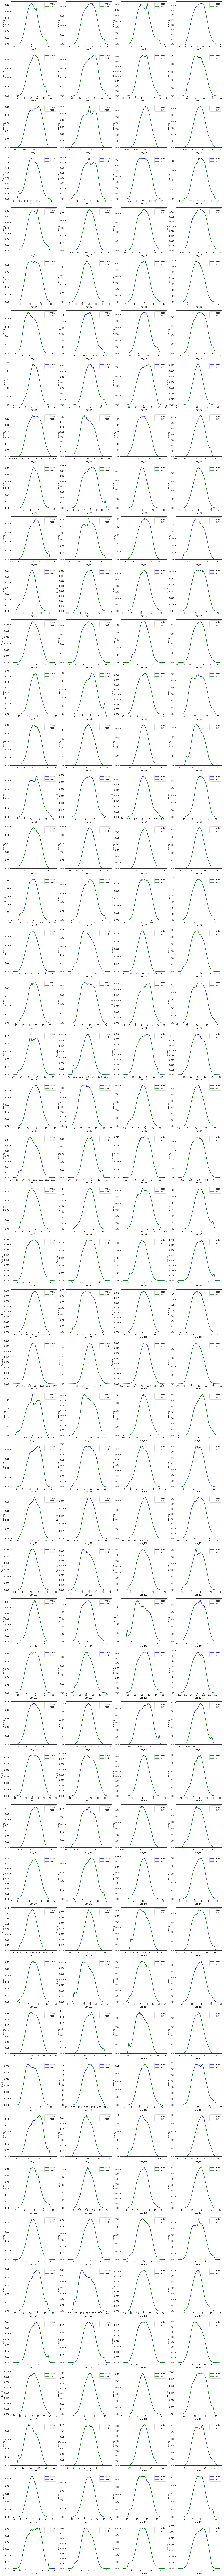

In [15]:
fig, axes = plt.subplots(n_rows, 4, figsize=(20, n_rows * 5))

for num, feature in enumerate(continuous_feature):
    try:
        train_data, test_data = train[feature].copy(), test[feature].copy()
        sns.kdeplot(train_data, ax=axes[num//4, num%4], color='blue', label='train')
        sns.kdeplot(test_data, ax=axes[num//4, num%4], color='green', label='test')
    except RuntimeError:
        pass
    except KeyError:
        train_data = train[feature].copy()
        sns.kdeplot(train_data, ax=axes[num//4, num%4], color='blue', label='train')
    axes[num//4, num%4].legend()

Хорошие непрерыные распределения. Многие близки к нормальным

#### Задание 4
Построить распределение основных статистики признаков (среднее, стандартное отклонение) в разрезе целевой переменной и распределение основных статистик обучающей и тестовой выборки, сделать выводы;


In [16]:
np.zeros(3)

array([0., 0., 0.])

In [17]:
df = train.groupby(['target'], as_index=False).agg(['mean','std'])
df = df.append(pd.Series(df.iloc[0] - df.iloc[1], name = 'difference'), ignore_index=False)
df

var_0               var_1                var_2            \
                 mean       std      mean       std       mean       std   
target                                                                     
0           10.626681  3.008564 -1.695770  4.024813  10.665876  2.612961   
1           11.156418  3.270293 -1.017613  4.220638  11.156633  2.841075   
difference  -0.529737 -0.261730 -0.678157 -0.195825  -0.490757 -0.228114   

               var_3                var_4               var_5            \
                mean       std       mean       std      mean       std   
target                                                                    
0           6.788979  2.040082  11.072412  1.620103 -5.146736  7.827522   
1           6.864113  2.070898  11.131337  1.649266 -4.336522  8.140281   
difference -0.075134 -0.030817  -0.058925 -0.029163 -0.810214 -0.312759   

               var_6                var_7               var_8            \
                mean       std       mean       std      mean       std   
target                                                                    
0           5.389620  0.857983  16.549306  3.417700  0.262347  3.331105   
1           5.581966  0.922442  16.514917  3.421365  0.479432  3.340028   
difference -0.192346 -0.064459   0.034389 -0.003665 -0.217085 -0.008923   

               var_9              var_10              var_11            \
                mean       std      mean       std      mean       std   
target                                                                   
0           7.584907  1.228839  0.398410  5.499197 -3.291479  5.955722   
1           7.409064  1.278709  0.357916  5.515060 -2.834888  6.083536   
difference  0.175843 -0.049871  0.040494 -0.015863 -0.456590 -0.127813   

               var_12              var_13              var_14            \
                 mean       std      mean       std      mean       std   
target                                                                    
0           14.028392  0.187441  8.615764  4.603038  7.542364  2.248042   
1           13.984464  0.207935  7.764618  4.888186  7.495020  2.246319   
difference   0.043928 -0.020494  0.851146 -0.285149  0.047343  0.001723   

               var_15              var_16              var_17            \
                 mean       std      mean       std      mean       std   
target                                                                    
0           14.570748  0.410909  9.326326  2.551915 -5.698669  6.716530   
1           14.594414  0.418237  9.395369  2.605433 -5.679385  6.677587   
difference  -0.023667 -0.007328 -0.069042 -0.053518 -0.019284  0.038943   

               var_18               var_19               var_20            \
                 mean       std       mean       std       mean       std   
target                                                                      
0           15.129914  7.805564  12.408389  7.981264  13.326894  5.871569   
1           16.265343  8.179688  12.708704  8.128723  12.968654  5.908411   
difference  -1.135429 -0.374124  -0.300315 -0.147460   0.358240 -0.036842   

               var_21              var_22              var_23            \
                 mean       std      mean       std      mean       std   
target                                                                    
0           17.418103  8.137105  4.247785  2.816560  3.024026  0.525768   
1           15.823715  8.578688  4.821429  3.067136  2.979384  0.535207   
difference   1.594388 -0.441583 -0.573644 -0.250576  0.044642 -0.009439   

               var_24               var_25              var_26            \
                 mean       std       mean       std      mean       std   
target                                                                     
0           10.548447  3.768895  13.666224  0.284984 -4.178694  5.847831   
1           10.906222  3.836304  13.678882  0.290182 -2.949112  6.446004   
difference  -0.3

In [18]:
def compare_stats(st):
    df = pd.concat([
        train[continuous_feature].agg([st]).rename(index={st: 'train ' + st}), 
        test.agg([st]).rename(index={st: 'test ' + st})]
    )
    df = df.append(pd.Series(df.loc['train ' + st] - df.loc['test ' + st], name = 'difference'), ignore_index=False)
    return df

In [19]:
compare_stats('mean')

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
train mean,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,7.567236,0.394340,-3.245596,14.023978,8.530232,7.537606,14.573126,9.333264,-5.696731,15.244013,12.438567,13.290894,17.257883,4.30543,3.019540,10.584400,13.667496,-4.055133,-1.137908,5.532980,5.053874,-7.687740,10.393046,-0.512886,14.774147,11.434250,3.842499,2.187230,5.868899,10.642131,0.662956,-6.725505,9.299858,11.222356,11.569954,8.948289,-12.699667,11.326488,-12.471737,14.704713,16.682499,12.740986,13.428912,-2.528816,6.008569,1.137117,12.745852,16.629165,6.272014,3.177633,8.931124,12.155618,-11.946744,0.874170,0.661173,6.369157,0.982891,5.794039,11.943223,5.018893,-3.331515,24.446811,0.669756,0.640553,19.610888,19.518846,16.853732,6.050871,19.066993,5.349479,14.402136,5.795044,14.719024,-3.471273,1.025817,-2.590209,18.362721,5.621058,11.351483,8.702924,3.725208,-16.548147,6.987541,12.739578,10.556740,10.999162,-0.084344,14.400433,18.539645,1.752012,-0.746296,-6.600518,13.413526,22.294908,1.568393,11.509834,4.244744,8.617657,17.796266,14.224435,18.458001,5.513238,6.312603,3.317843,8.136542,3.081191,2.213717,2.402570,16.102233,-5.305132,3.032849,24.521078,11.310591,1.192984,7.076254,4.272740,12.489165,13.202326,0.851507,-1.127952,15.460314,12.257151,0.544674,7.799676,6.813270,-4.826053,-4.259472,22.968602,17.613651,1.210792,7.760193,3.423636,2.897596,11.983489,12.333698,8.647632,4.841328,10.341178,-3.300779,3.990726,5.296237,16.817671,10.141542,7.633199,16.727902,6.974955,-2.074128,13.209272,-4.813552,17.914591,10.223282,24.259300,5.633293,5.362896,11.002170,-2.871906,19.315753,2.963335,-4.151155,4.937124,5.636008,-0.004962,-0.831777,19.817094,-0.677967,20.210677,11.640613,-2.799585,11.882933,-1.014064,2.591444,-2.741666,10.085518,0.719109,8.769088,12.756676,-3.983261,8.970274,-10.335043,15.377174,0.746072,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
test mean,10.658737,-1.624244,10.707452,6.788214,11.076399,-5.050558,5.415164,16.529143,0.277135,7.569407,0.371335,-3.268551,14.022662,8.540872,7.532703,14.573704,9.321669,-5.704450,15.265776,12.456675,13.298428,17.230598,4.29901,3.019707,10.567479,13.666970,-3.983721,-1.129536,5.530656,5.047247,-7.687695,10.404920,-0.524830,14.762686,11.434861,3.870130,2.213288,5.875048,10.647806,0.672667,-6.736054,9.270646,11.221732,11.568972,8.952581,-12.666095,11.299741,-12.455577,14.685615,16.687280,12.745666,13.391711,-2.516943,6.015355,1.133257,12.756876,16.604447,6.273477,3.190170

In [20]:
compare_stats('std')

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
train std,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,1.235070,5.500793,5.970253,0.190059,4.639536,2.247908,0.411711,2.557421,6.712612,7.851370,7.996694,5.876254,8.196564,2.847958,0.526893,3.777245,0.285535,5.922210,1.523714,0.783367,2.615942,7.965198,2.159891,2.587830,4.322325,0.541614,5.179559,3.119978,2.249730,4.278903,4.068845,8.279259,5.938088,0.695991,0.309599,5.903073,21.404912,2.860511,10.579862,11.384332,7.855762,0.691709,8.187306,4.985532,0.764753,8.414241,5.690072,3.540174,0.795026,4.296686,0.854798,4.222389,11.622948,2.026238,3.113089,1.485854,3.786493,1.121366,7.365115,0.007186,3.955723,11.951742,0.266696,3.944703,7.466303,14.112591,6.055322,7.938351,3.817292,1.993792,1.309055,7.436737,2.299567,8.479255,8.297229,6.225305,3.908536,7.751142,5.661867,2.491460,3.560554,13.152810,0.152641,4.186252,0.543341,2.768099,0.621125,8.525400,12.642382,0.715836,1.862550,9.181683,4.950537,8.628179,0.185020,1.970520,0.855698,1.894899,7.604723,0.171091,4.355031,3.823253,1.082404,1.591170,4.459077,0.985396,2.621851,1.650912,13.297662,8.799268,4.182796,12.121016,1.714416,5.168479,6.147345,2.736821,0.318100,0.776056,3.137684,3.238043,4.136453,0.832199,0.456280,1.456486,0.375603,6.166126,7.617732,10.382235,8.890516,4.551750,7.686433,4.896325,6.715637,5.691936,2.934706,0.922469,3.899281,2.518883,7.413301,0.199192,10.385133,2.464157,3.962426,3.005373,2.014200,4.961678,5.771261,0.955140,5.570272,7.885579,4.122912,10.880263,0.217938,1.419612,5.262056,5.457784,5.024182,0.369684,7.798020,3.105986,0.369437,4.424621,5.378008,8.674171,5.966674,7.136427,2.892167,7.513939,2.628895,8.579810,2.798956,5.261243,1.371862,8.963434,4.474924,9.318280,4.725167,3.189759,11.574708,3.944604,0.976348,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
test std,3.036716,4.040509,2.633888,2.052724,1.616456,7.869293,0.864686,3.424482,3.333375,1.231865,5.508661,5.961443,0.190071,4.628712,2.255257,0.411592,2.544860,6.746460,7.846983,7.989812,5.884245,8.199877,2.844023,0.527951,3.771047,0.285454,5.945853,1.524765,0.785618,2.610078,7.971581,2.156324,2.588700,4.325727,0.541040,5.170614,3.120685,2.257235,4.260820,4.078592,8.298827,5.944335,0.694831,0.309927,5.911181,21.402708,2.860911,10.535003,11.382443,7.877107,0.690394,8.192913,4.969897,0.764381,8.418369,5.699920,3.549413,0.798123,4.303706,0.852982,4.211900,11.632700,2.029280,3.111174,1.480398,3.789367,1.124349,7.370539,0.007194,3.959641,11.933799,0.266336,3.957074,7.474120,14.0

Как в разрезе целевой переменной, так и в разрезе обучащая/тестовая выборка статистики данных близки

#### Задание 5
Построить распределение коэффициентов корреляции между признаками. Есть ли зависимость между признаками (будем считать, что связь между признаками отсутствует, если коэффициент корреляции < 0.2)?

In [21]:
correlation = numerical_features.corr()
corr_with_target = correlation['target'].sort_values(ascending = False)
corr_with_target

target     1.000000
var_6      0.066731
var_110    0.064275
var_53     0.063399
var_26     0.062422
             ...   
var_76    -0.061917
var_146   -0.063644
var_12    -0.069489
var_139   -0.074080
var_81    -0.080917
Name: target, Length: 201, dtype: float64

<AxesSubplot:title={'center':'Correlation of Numeric Features with Target'}>

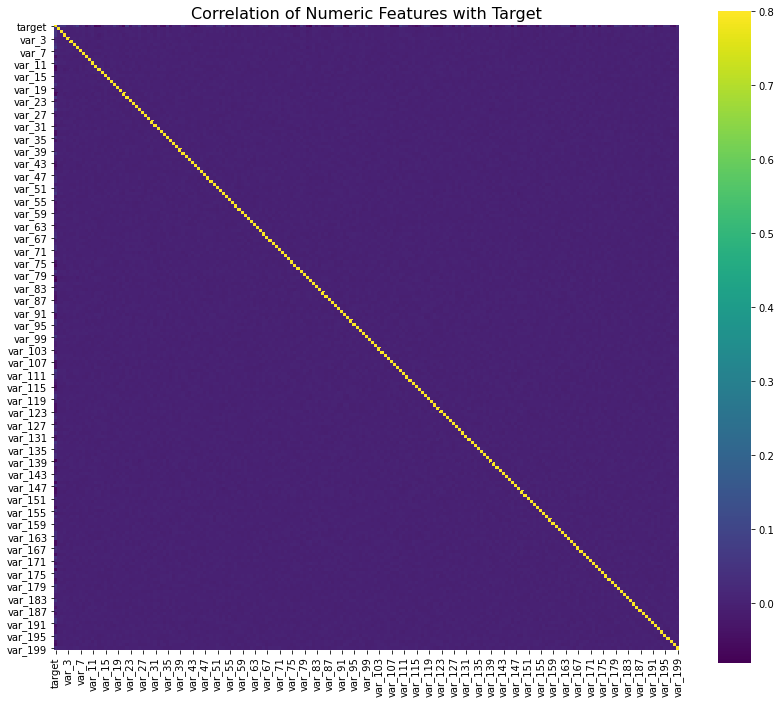

In [22]:
fig, axes = plt.subplots(figsize = (14,12))
plt.title('Correlation of Numeric Features with Target', y=1, size=16)
sns.heatmap(correlation, square=True, vmax=0.8, cmap='viridis')

Очень хороший датасет. Признаки отлично отобраны. Зависимости между признаками нет.

#### Задание 6
Выявить 10 признаков, которые обладают наибольшей нелинейной связью с целевой переменной.

In [23]:
%%time
parameters = {
    'max_depth': 6, 
    'n_estimators': 25,
    'random_state': 42, 
    'n_jobs': -1
}

forest = RandomForestRegressor(**parameters)
_ = forest.fit(numerical_features.drop('target', axis=1), train['target'])

CPU times: user 9min 5s, sys: 22.2 ms, total: 9min 5s
Wall time: 1min 18s


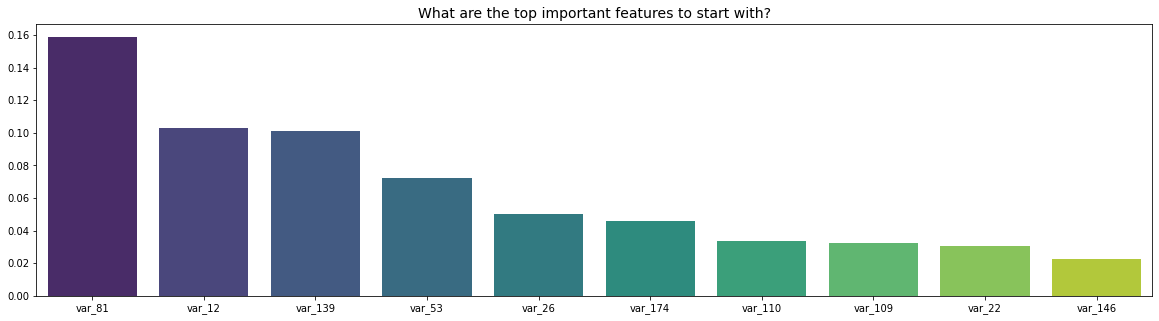

In [24]:
n_top = 10
importances = forest.feature_importances_
idx = np.argsort(importances)[::-1][0:n_top]
feature_names = numerical_features.drop('target', axis=1).columns

plt.figure(figsize=(20, 5))
sns.barplot(x=feature_names[idx], y=importances[idx], palette='viridis')
_ = plt.title('What are the top important features to start with', size=14)

#### Задание 7 (опция)
Провести анализ идентичности распределения признаков на обучающей и тестовой выборках, сделать выводы.

In [25]:
features_to_score = numerical_features.drop(['target'], axis=1).columns.tolist()

In [26]:
X_adv = pd.concat([
    train[features_to_score], test[features_to_score]
])
y_adv = np.hstack(
    (np.ones(train.shape[0]), np.zeros(test.shape[0])))

X_adv = X_adv.reset_index(drop=True)

In [29]:
%%time
parameters = {
    'max_depth': 4, 
    'n_estimators': 50, 
    'random_state': 42, 
    'n_jobs': -1,
    'verbosity': 0
}
model = xgb.XGBClassifier(**parameters)

cv = cross_val_score(
    estimator=model,
    X=X_adv, y=y_adv,
    scoring='roc_auc',
    cv=KFold(n_splits=3, shuffle=True, random_state=27)
)

print(f"CV-score: {round(np.mean(cv), 4)}")

CV-score: 0.5116
CPU times: user 18min 46s, sys: 2.16 s, total: 18min 48s
Wall time: 2min 25s


Text(0.5, 1.0, 'Top Importance Features for Adversarial Validation (train vs test)')

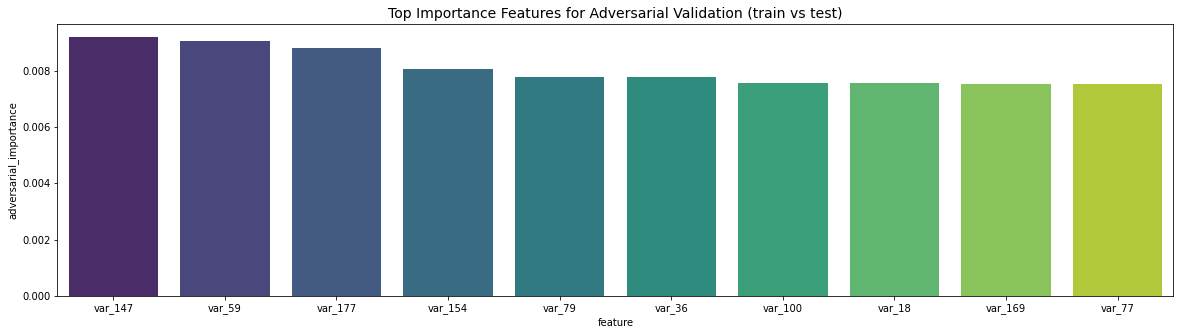

In [31]:
model.fit(X_adv, y_adv)

importance = pd.DataFrame({
    'feature': X_adv.columns,
    'adversarial_importance': model.feature_importances_
})
importance = importance.sort_values(by='adversarial_importance', ascending=False)
importance = importance.head(n=10)

plt.figure(figsize=(20, 5))
sns.barplot(x=importance['feature'], y=importance['adversarial_importance'], palette='viridis')
plt.title('Top Importance Features for Adversarial Validation (train vs test)', size=14)

Выборки можно считать идентичными